In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from sklearn.model_selection import train_test_split

from src.constants import MODEL_PATH
from src.data import Data
from src.evaluation import Evaluation
from src.explanation import report_model
from src.feature_engineering import FeatureEngineering, FeatureSelection
from src.genetic_algorithm import GeneticAlgorithm
from src.model import Model
from src.model_selection import ModelSelection
from src.preprocessing import DataPreprocessor

In [3]:
data = Data()
essays = data.load()

In [4]:
data_preprocessor = DataPreprocessor()
preprocessed_data = data_preprocessor.preprocess(essays)

In [5]:
feature_selection = FeatureSelection()
X, y = feature_selection.extract_features_and_labels(preprocessed_data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
feature_engineering = FeatureEngineering("one_hot_encoding")
feature_engineering.fit(X_train)
X_train_transformed = feature_engineering.transform(X_train)
X_test_transformed = feature_engineering.transform(X_test)

In [7]:
model_selection = ModelSelection()
model_selection.fit(X_train_transformed, y_train, X_test_transformed, y_test)

100%|██████████| 42/42 [00:10<00:00,  3.92it/s]

| Model                         |   Adjusted R-Squared |    R-Squared |         RMSE |   Time Taken |
|:------------------------------|---------------------:|-------------:|-------------:|-------------:|
| XGBRegressor                  |          0.470382    |  0.853899    | 12.6409      |   0.46716    |
| BaggingRegressor              |          0.449271    |  0.848075    | 12.8904      |   0.02139    |
| ExtraTreesRegressor           |          0.376411    |  0.827975    | 13.7166      |   0.102013   |
| RandomForestRegressor         |          0.361891    |  0.82397     | 13.8754      |   0.115899   |
| GradientBoostingRegressor     |          0.305011    |  0.808279    | 14.4806      |   0.0418339  |
| DecisionTreeRegressor         |          0.272055    |  0.799188    | 14.82        |   0.00659204 |
| HistGradientBoostingRegressor |          0.180932    |  0.77405     | 15.7202      |   2.22534    |
| LGBMRegressor                 |          0.167364    |  0.770307    | 15.8499   

In [8]:
model = Model(model_class=model_selection.get_best_model_class())
model.fit(X_train_transformed, y_train)
model.save(MODEL_PATH)
predictions = model.predict(X_train_transformed)

Root Mean Squared Error: 4.281134119080152
Mean Absolute Error: 2.0903990560492223
R2 Score: 0.9812651702562109


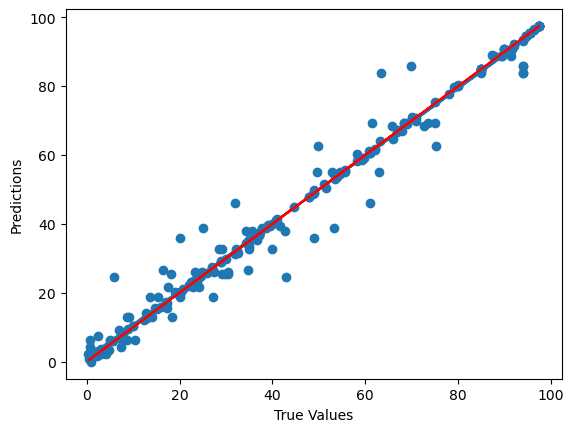

In [9]:
evaluation = Evaluation()
evaluation.report(y_train, predictions)

Root Mean Squared Error: 12.64094626029344
Mean Absolute Error: 7.708281621124786
R2 Score: 0.8538985284029523


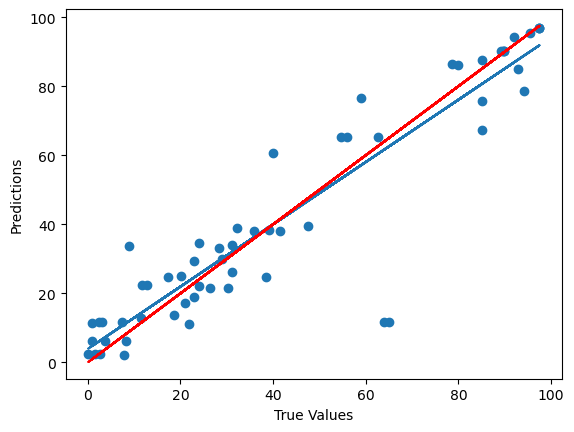

In [10]:
evaluation.report(y_test, model.predict(X_test_transformed))

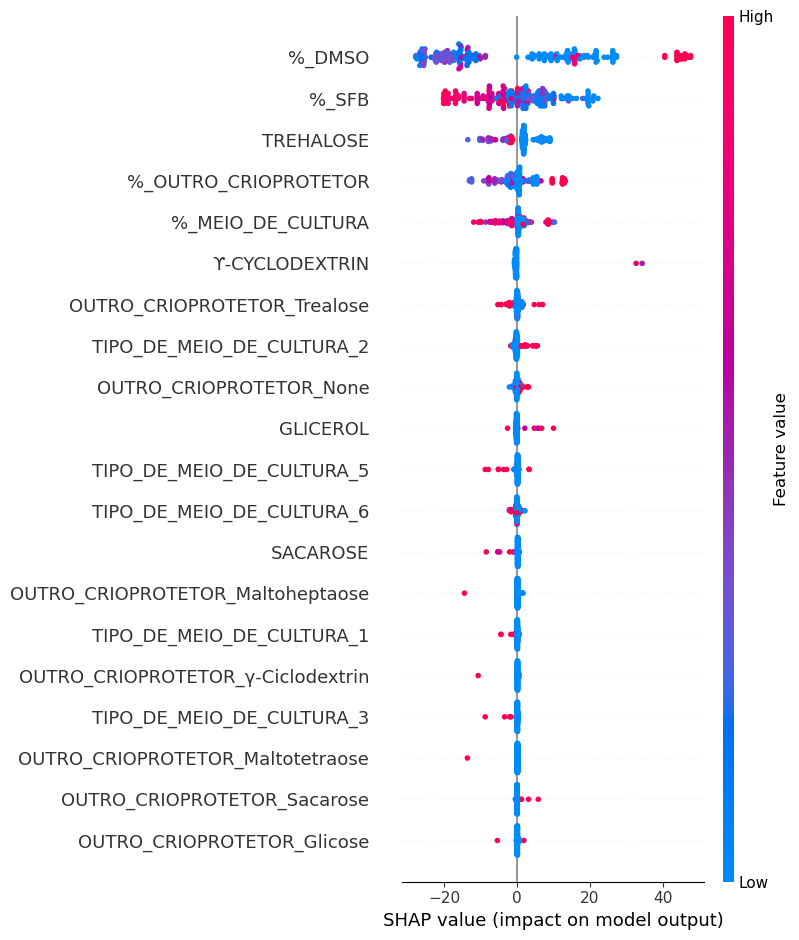

In [11]:
report_model(model, X_train_transformed)

In [12]:
genetic_algorithm = GeneticAlgorithm(
    X_train_transformed,
    model,
    population_size=30,
    max_generations=1000,
)
genetic_algorithm.fit()
genetic_algorithm.report_best_individual()

Best individual:
|                                   |   0 |
|:----------------------------------|----:|
| LACTOSE                           |   0 |
| GLICEROL                          |   0 |
| %_OUTRO_CRIOPROTETOR              |   0 |
| Di-rhamnolipids                   |   0 |
| TREHALOSE                         |   0 |
| %_MEIO_DE_CULTURA                 |  40 |
| RAFFINOSE                         |   0 |
| %_SFB                             |  95 |
| DEXTRAN                           |   0 |
| SACAROSE                          |   0 |
| ϒ-CYCLODEXTRIN                    |   0 |
| MALTOTETRAOSE                     |   0 |
| %_DMSO                            |   5 |
| GLICOSE                           |   0 |
| MALTOTRIOSE                       |   0 |
| %_SOLUÇÃO_TOTAL                   | 100 |
| MALTOEXAOSE                       |   0 |
| MALTOHEPTAOSE                     |   0 |
| MALTOSE                           |   0 |
| MALTOPENTAOSE                     |   0 |
| OUTRO_CRIOPRO

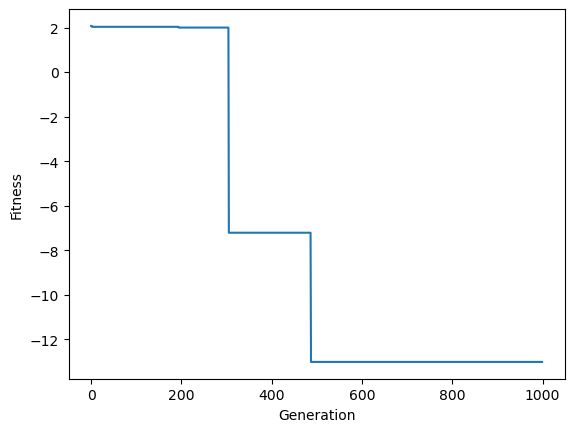

In [13]:
genetic_algorithm.show_history()